In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sb

In [2]:
files=["../logs/sensors_230507_231802.csv","../logs/sensors_230529_010649.csv","../logs/sensors_230713_112330.csv"]
frames=[]

for f in files:
    dff=pd.read_csv(f).dropna()
    dff["time"]=pd.to_datetime(dff["time"],format="mixed")
    dff=dff.set_index('time')
    frames.append(dff)
    
df=pd.concat(frames)
print(df.shape)
df.iloc[[0,1,-2,-1]]

(14286143, 12)


,temperature,pressure,humidity,gas_resistance,iaq,oxidising,reducing,nh3,r,g,b,c
time,,,,,,,,,,,,
2023-05-07 23:23:05.081981,23.37900,1021.68,38.933,1.617374e+06,99.333125,76708.333333,193260.869565,100106.194690,0.0,0.0,0.0,0.0
2023-05-07 23:23:06.079288,23.31175,1021.69,38.933,1.616417e+06,99.333125,76708.333333,193260.869565,100212.534060,0.0,0.0,0.0,0.0
2023-10-21 03:25:04.274936,22.01650,980.48,39.082,8.744663e+05,99.426250,123858.823529,156924.791086,99788.043478,0.0,0.0,0.0,0.0
2023-10-21 03:25:05.275683,22.02900,980.48,39.076,8.655959e+05,99.422500,123858.823529,156924.791086,99788.043478,0.0,0.0,0.0,0.0


In [5]:
df[["temperature","pressure","humidity","gas_resistance","iaq","oxidising","reducing","nh3", "c"]].corr()

,temperature,pressure,humidity,gas_resistance,iaq,oxidising,reducing,nh3,c
temperature,1.000000,-0.041351,0.031853,-0.386940,0.199420,-0.320731,-0.297817,-0.594327,0.081037
pressure,-0.041351,1.000000,-0.247098,0.260516,-0.306587,0.126270,-0.096605,0.256840,0.104618
humidity,0.031853,-0.247098,1.000000,-0.532157,0.356413,-0.578213,-0.087361,-0.621715,-0.200965
gas_resistance,-0.386940,0.260516,-0.532157,1.000000,-0.228291,0.695587,0.573105,0.861637,0.092101
iaq,0.199420,-0.306587,0.356413,-0.228291,1.000000,-0.045391,0.247487,-0.336712,-0.035961
oxidising,-0.320731,0.126270,-0.578213,0.695587,-0.045391,1.000000,0.460879,0.761212,0.052694
reducing,-0.297817,-0.096605,-0.087361,0.573105,0.247487,0.460879,1.000000,0.505871,-0.009548
nh3,-0.594327,0.256840,-0.621715,0.861637,-0.336712,0.761212,0.505871,1.000000,0.104171
c,0.081037,0.104618,-0.200965,0.092101,-0.035961,0.052694,-0.009548,0.104171,1.000000


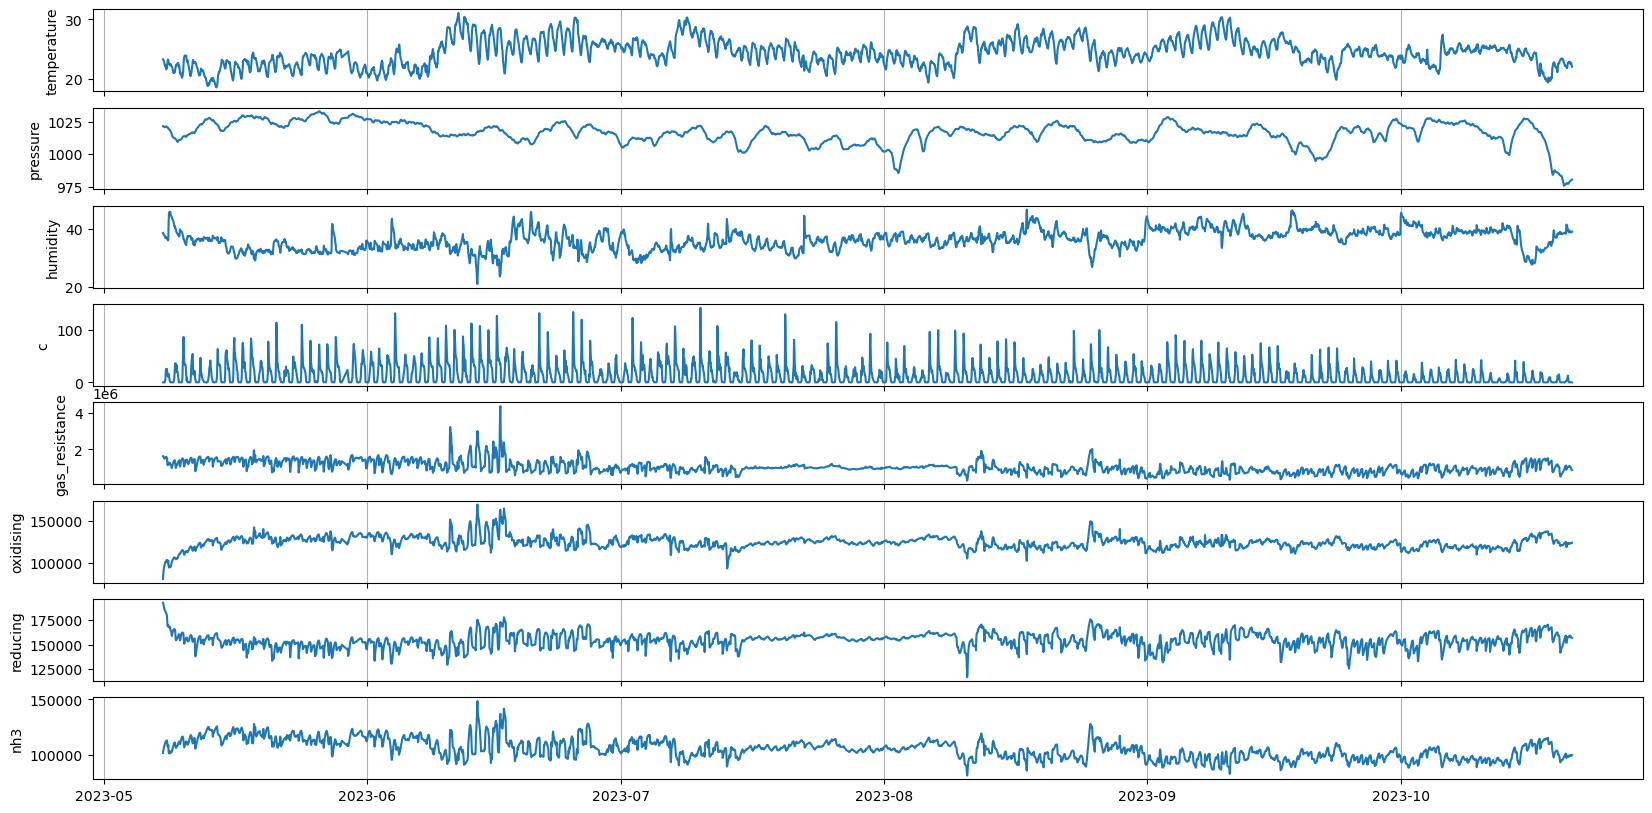

In [6]:
df_dmean = df.groupby(pd.Grouper(freq='d')).mean().dropna(how='all')
df_dmax = df.groupby(pd.Grouper(freq='d')).max().dropna(how='all')
df_hmean = df.groupby(pd.Grouper(freq='H')).mean().dropna(how='all')
# df2[['pressure','humidity','light']].plot(figsize=(15,10))

# plt.figure(figsize=(15,10))
# plt.plot(df[['pressure','humidity']],label=['pressure','humidity'])
# plt.twinx()
# plt.legend()
# plt.plot(df2[['light']],label='light')
# plt.legend()

cols=["temperature","pressure","humidity","c","gas_resistance", "oxidising", "reducing", "nh3"]

df_sel=df_hmean#["2023-05-07":"2023-05-29"]

fig,axes=plt.subplots(len(cols),1,sharex=True,figsize=(20,10))

for col,ax in zip(cols,axes):
    ax.plot(df_sel[col],label='col')
    ax.grid(axis='x')
    ax.set_ylabel(col)
    
# pres.plot(df_sel['pressure'],label='pressure',c='r')
# hum.plot(df_sel['humidity'],label='humidity',c='g')
# light.plot(df_sel['light'],label='light')
# for ax in fig.axes:
#     ax.grid(axis='x')

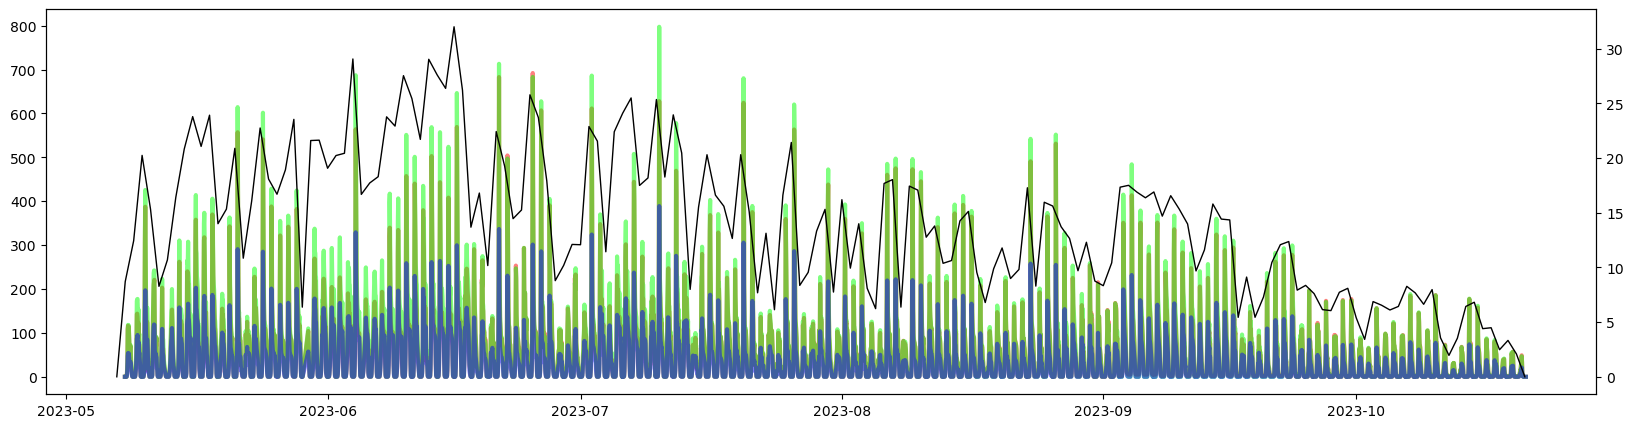

In [7]:
plt.figure(figsize=(20,5))
plt.plot(df_hmean["r"],"#ff0000",df_hmean["g"],"#00ff00",df_hmean["b"],"#0000ff",alpha=0.5,linewidth=3)
plt.twinx()
plt.plot(df_dmean["c"],"k",linewidth=1)

<BarContainer object of 3974 artists>

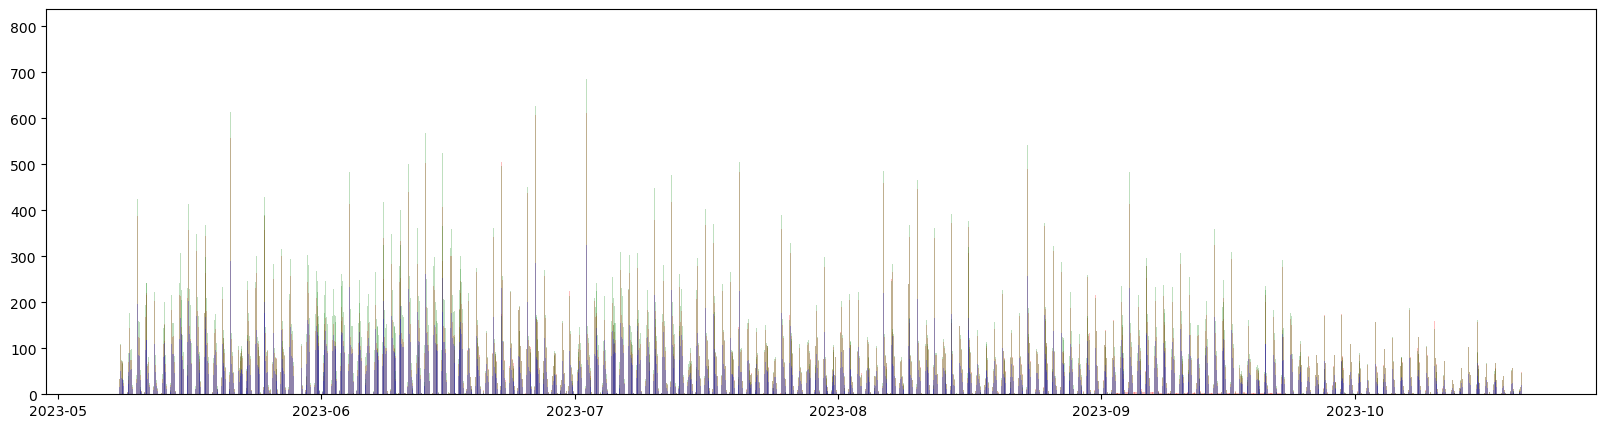

In [8]:
plt.figure(figsize=(20,5))
plt.bar(df_hmean.index, df_hmean["r"],width=0.05,alpha=0.25,color="r")
plt.bar(df_hmean.index, df_hmean["g"],width=0.05,alpha=0.25,color="g")
plt.bar(df_hmean.index, df_hmean["b"],width=0.05,alpha=0.25,color="b")